# NLP Project _Twitter US Airline Sentiment_Prabhu_12Mar2020_Rev0

## **Objective:**
To implement the techniques learnt as a part of the course.

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from 
February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed 
by categorizing negative reasons (such as "late flight" or "rude service").


## **Steps and Tasks:**
1) Import the libraries, load dataset, print shape of data, data description. (5 Marks)

2) Understand of data-columns: (5 Marks)
a. Drop all other columns except “text” and “airline_sentiment”.
b. Check the shape of data.
c. Print first 5 rows of data.

3) Text pre-processing: Data preparation. (20 Marks)
a. Html tag removal.
b. Tokenization.
c. Remove the numbers.
d. Removal of Special Characters and Punctuations.
e. Conversion to lowercase.
f. Lemmatize or stemming.
g. Join the words in the list to convert back to text string in the dataframe. (So that each row 
contains the data in text format.)
h. Print first 5 rows of data after pre-processing.

4) Vectorization: (10 Marks)
a. Use CountVectorizer.
b. Use TfidfVectorizer.

5) Fit and evaluate model using both type of vectorization. (6+6 Marks)

6) Summarize your understanding of the application of Various Pre-processing and Vectorization and 
performance of your model on this dataset. (8 Marks)




#### The purpose of this analysis is to make up a prediction model where we will be able to predict whether a recommendation is positive or negative. In this analysis, we will focus the positive/negative sentiment of the recommendation.



In [1]:
# install and import necessary libraries.

!pip install contractions

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.
import seaborn as sns

import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

import warnings
warnings.filterwarnings('ignore')

In C:\Users\brama\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\brama\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\brama\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\brama\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\brama\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
# Loading data into pandas dataframe
data = pd.read_csv("Tweets.csv")

In [3]:
data.head()                                              # Print first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
data.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [5]:
data.shape

(14640, 15)

In [6]:
# Analyze and Visualize data before dropping columns suggested
#counting the number of tweets each airlines has received 
data.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

Text(0, 0.5, 'No. of Tweets')

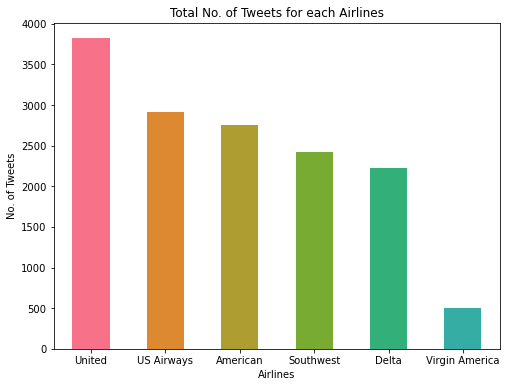

In [7]:
#Plotting the number of tweets each airlines has received
colors=sns.color_palette("husl", 10) 
pd.Series(data["airline"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(8,6),fontsize=10,rot = 0, title = "Total No. of Tweets for each Airlines")
plt.xlabel('Airlines', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

In [8]:
#counting the number of each type of sentiments 
data.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

<AxesSubplot:title={'center':'Total Tweets for Each Sentiment'}, ylabel='airline_sentiment'>

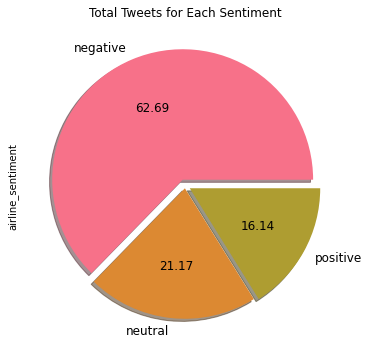

In [9]:
colors=sns.color_palette("husl", 10)
pd.Series(data["airline_sentiment"]).value_counts().plot(kind="pie",colors=colors,
    labels=["negative", "neutral", "positive"],explode=[0.05,0.02,0.04],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total Tweets for Each Sentiment")

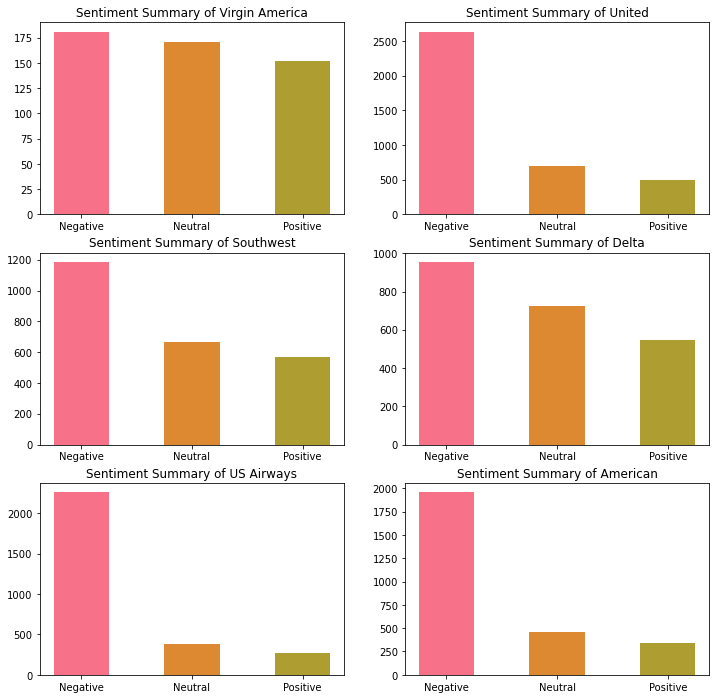

In [10]:
def plot_sub_sentiment(Airline):
    pdf = data[data['airline']==Airline]
    count = pdf['airline_sentiment'].value_counts()
    Index = [1,2,3]
    color=sns.color_palette("husl", 10)
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.title('Sentiment Summary of' + " " + Airline)

airline_name = data['airline'].unique()
plt.figure(1,figsize=(12,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])

In [11]:
#counting the total number of negative reasons
data.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

Text(0, 0.5, 'No. of Tweets')

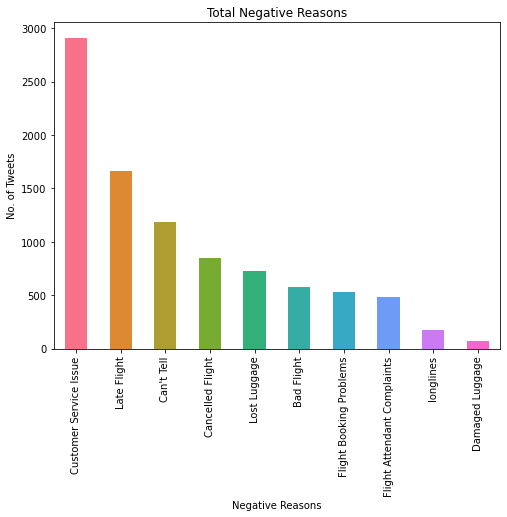

In [12]:
#Plotting all the negative reasons 
color=sns.color_palette("husl", 10)
pd.Series(data["negativereason"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

<AxesSubplot:title={'center':'Airline Sentiment'}, xlabel='airline'>

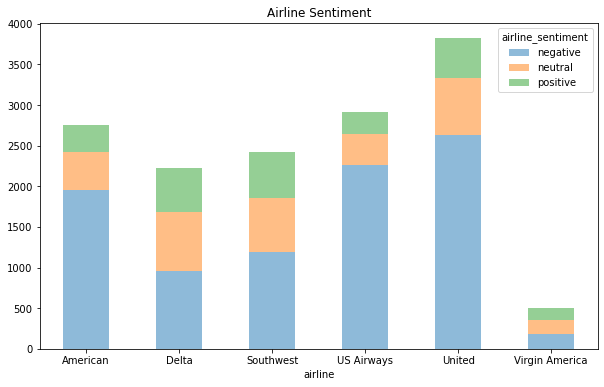

In [13]:
pd.crosstab(index = data["airline"],columns = data["airline_sentiment"]).plot(kind='bar',
                figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Airline Sentiment")

In [14]:
# a. Drop all other columns except “text” and “airline_sentiment”. b. Check the shape of data. c. Print first 5 rows of data.
data.drop(['tweet_id','airline_sentiment_confidence','negativereason','negativereason_confidence','airline', 'airline_sentiment_gold', 'name','negativereason_gold','retweet_count','tweet_coord','tweet_created', 'tweet_location','user_timezone'],axis=1,inplace=True)

In [15]:
data.head()    # checking after dropping columns

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [16]:
data.nunique()

airline_sentiment        3
text                 14427
dtype: int64

In [17]:
# Taking only 50000 entries for demonstration purpose. As full data will take more time to process.
# Only keeping score and Text columns from the data, as these are useful for our analysis.

#data = data.loc[:49999, ['Score', 'Text']]

In [18]:
data.isnull().sum(axis=0)                                # Check for NULL values.

airline_sentiment    0
text                 0
dtype: int64

In [19]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [20]:
data.shape                                # Shape of data

(14640, 2)

### Data Pre-processing:

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data

We have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words.

In [21]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [22]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [23]:
def remove_numbers(text):
  Text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [24]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [25]:
data.head()                                                                    # Look at how tokenized data looks.

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


In [26]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))                              

In [27]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica not today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing


In [28]:
# Vectorization (Convert text data to numbers) -- Count Vectrorization
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=4000) 
#vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [29]:
data_features.shape

(14640, 4000)

In [30]:
labels = data['airline_sentiment']
#labels = labels.astype('int')

In [31]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [32]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7217213114754097


In [33]:
# Predict the result for test data using the model built above.
result = forest.predict(X_test)

[[2530  213   71]
 [ 393  413   78]
 [ 198  105  391]]


<AxesSubplot:>

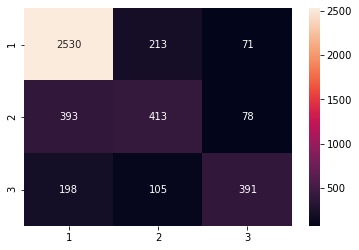

In [34]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, fmt='g')

In [35]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [36]:
from sklearn.linear_model import LogisticRegression   # importing logistic regression from scikit learn

model = LogisticRegression(random_state=7)  #assigning a variable for the algorithm

model.fit(X_train, y_train) #training of model

LogisticRegression(random_state=7)

In [37]:
y_predict = model.predict(X_test)     #model is predicting y values based on test dataset given to the model

print("Training accuracy",model.score(X_train,y_train))  # this will give training accuracy as training data has been used
print()
print("Testing accuracy",model.score(X_test, y_test))   # this will give testing accuracy as testing data has been used

Training accuracy 0.9064207650273224

Testing accuracy 0.7959927140255009


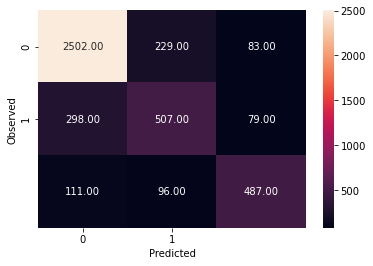

In [38]:
draw_cm(y_test,y_predict)

In [39]:
# Vectorization  -- Using TfidfVectorizer to convert text data to numbers.   ----- TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(max_features=1000)
vectorizer = TfidfVectorizer(max_features=4000)        # use max_features
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 4000)

In [40]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7099043715846995


In [41]:
result = forest.predict(X_test)

<AxesSubplot:>

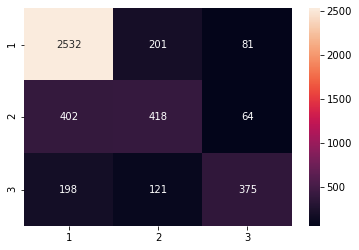

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, fmt='g')

# Summary


Summary:

- The goal was to build a model for text-classification.
- Used dataset which has reviews in text format and their sentiment score " positive" , "neutral" and "negative

- Checked shape , printed first 5 rows
- Visualized the data with graphs -- to analyze data airline wise and sentiment wise before dropping coloumns

- Visualized and displayed graph Catogorizing Negative reasons 

- Dropped all columns expecpt " text" and "Airline_sentiment"

- Pre-processed the data using variuos techniques and libraries.

- Removed html, applied Tokenization, removed numbers, removed special characters and punctuations, converted to lower case.
- data was pre=processed using Lemmatizing / Stemming and Joined the words back
- The pre-precessed data is converted to numbers, so that we can feed the data in the model.

- Used Vectorization 
- Count Vectorizer and TfidfVectorizer was used.

- Random Forest Classification Model was built for both Count Vectorizer and TfidfVectorizer
- Both were models were fit and evaluated  
- Confusion matrix for both Count Vectorizer and TfidfVectorizer
- After building the classification model, we predicted the result for the test data.


- After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
- Training accuracy using Count Vectoriztion  = 0.9064207650273224
- Testing accuracy  using Count Vectoriztion  = 0.7959927140255009
- Validation Accurancy using TfidfVectorizer = 0.719808743169399
- Initially tried 1000 entries and then used 4000 entries for improving the the model the training and testing accuracy.